<a href="https://www.kaggle.com/code/eavprog/abscur-tovar-sharp?scriptVersionId=133811306" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный)

На Московской бирже есть множество различных товаров, в которые можно вложиться. Чтобы помочь инвесторам определить самые выгодные варианты для их инвестиций, мы предлагаем ранжирование товаров Московской биржи по коэффициенту Шарпа.

Ранжирование производится для долларовых и абсолютных курсов товаров, и делается для разных временных прромежутков - от месяца до 5 лет. Это позволяет выявить самые выгодные для вложения товары в зависимости от желаемого горизонта инвестиций.

Коэффициент Шарпа является метрикой, которая оценивает доходность инвестиций с учетом риска. Он рассчитывается как соотношение прибыли инвестиций к стандартному отклонению доходности. Чем выше коэффициент Шарпа, тем выше доходность инвестиций по сравнению с риском.

Рейтинги обновляются не реже чем раз в два дня, что позволяет инвесторам отслеживать изменения в доходности и риске различных товаров и сделать информированные инвестиционные решения.

При ранжировании товаров на Московской бирже мы можем использовать и долларовые курсы товаров, и абсолютные курсы товаров. Абсолютные курсы товаров получены умножением долларового курса товара на абсолютный курс доллара. Рейтинги товаров, построенные на основе долларовых курсов, могут отличаться от рейтингов, построенных на основе абсолютных курсов товаров. Это может быть связано с тем, что долларовый курс товара содержит в себе риски волатильности абсолютного курса доллара.

При выборе товара для инвестирования, предпочтительнее выбирать рейтинги на основе абсолютных курсов товаров, так как они отражают реальную доходность инвестиций независимо от курса доллара. Это позволяет инвесторам лучше оценивать риски и возможности дохода инвестиций в различные товары.

Важно помнить, что ранжирование товаров по коэффициенту Шарпа является одним из инструментов для оценки вложений и не является единственным критерием при принятии решений о вложениях. Инвесторы должны также учитывать фундаментальные и технические факторы, а также общую экономическую и политическую ситуацию при принятии инвестиционных решений.

# Оглавление проекта "Абсолютный валютный курс" 

![Проект "Абсолютный валютный курс"](https://i.ibb.co/cL0D27B/abscur-znak.jpg)

## Представительства проекта:
[**БЛОГ**](http://www.abscur.ru) - 
[**VK**](https://vk.com/abscur) - 
[**WhatsApp**](https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs) - 
[**Viber**](https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc) - 
[**Telegram**](https://t.me/AbsCur) - 
[**ОК**](https://ok.ru/group/53547043520717) - 
[**GitHub**](https://github.com/prog815/abscur) - 
[**YouTube**](https://www.youtube.com/@eavprog8/community) - 
[**Smart-Lab**](https://smart-lab.ru/my/eavpred/) - 
[**VC.ru**](https://vc.ru/s/1826351-absolyutnyy-kurs-valyut) - 
[**Kaggle**](https://www.kaggle.com/code/eavprog/abscur-about)

## Абсолютные валютные курсы:
- [О проекте](https://www.kaggle.com/eavprog/abscur-about)
- [Источник данных с абсолютными курсами](https://www.kaggle.com/code/eavprog/abscur-data) 
- [Последние абсолютные курсы](https://www.kaggle.com/code/eavprog/abscur-posled-kurs)
- [Графики истории абсолютных валютных курсов](https://www.kaggle.com/eavprog/abscur-hist)
- [Стоимость Абса](https://www.kaggle.com/eavprog/abscur-stoimost-absa)
- [Связь валют на графах через корреляцию](https://www.kaggle.com/code/eavprog/abscur-svyas-valut)
- [Рейтинг абсолютной доходности](https://www.kaggle.com/eavprog/abscur-reyting-dohod)
- [Рейтинг валют по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-sharp)
- [Рейтинг абсолютной стабильности валют](https://www.kaggle.com/eavprog/abscur-reit-stabil)

## Парные валютные курсы
- [Графики истории парных валютных курсов](https://www.kaggle.com/eavprog/abscur-par-hist)

## Голубые фишки Московской биржи
- [Абсолютные курсы голубых фишек Московской биржи](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki)
- [Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp)
- [Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-bluefish-sharp-rub)

## Товары Московской биржи
- [Абсолютные курсы товаров Мосбиржи](https://www.kaggle.com/eavprog/mmvb-abscur-tovar)
- [Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный)](https://www.kaggle.com/eavprog/abscur-tovar-sharp)

---



# За месяц

## За месяц (абсолютные курсы)

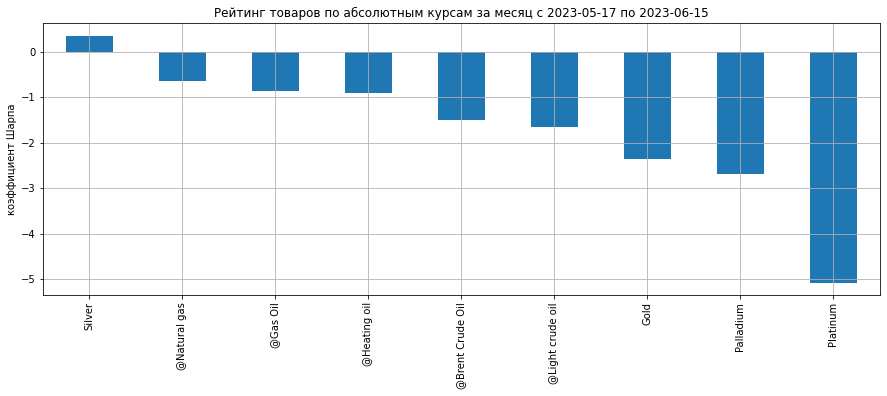

**Самые подросшие и самые упавшие по абсолютному курсу товары Мосбиржи за месяц:**

|Товар|Изменение|Ссылки|
|-|-|-|
|**Silver**|0.359%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Silver)|
|**@Natural gas**|-0.631%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Natural-gas)|
|**@Gas Oil**|-0.856%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|
|...|...|...|
|**@Brent Crude Oil**|-1.509%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Brent-Crude-Oil)|
|**@Light crude oil**|-1.645%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Light-crude-oil)|
|**Gold**|-2.362%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|**Palladium**|-2.679%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|
|**Platinum**|-5.08%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Platinum)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-месяц), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-месяц), [**Рейтинг абсолютной доходности за месяц**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-месяц), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-месяц), [**Рейтинг абсолютной стабильности валют за месяц**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-месяц)

## За месяц (долларовые курсы)

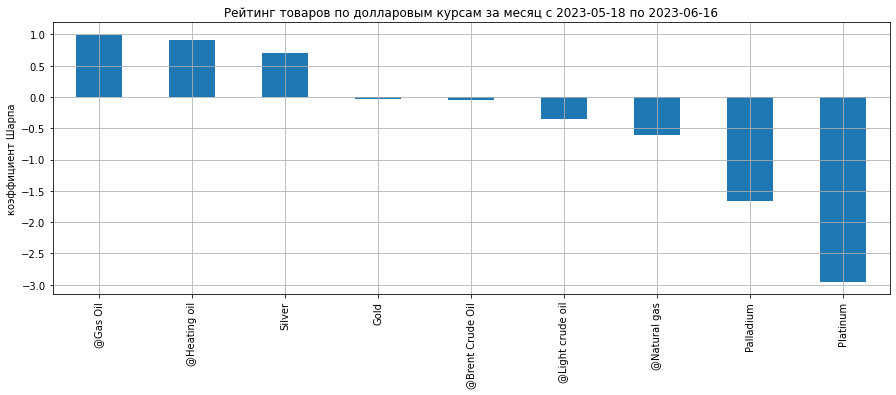

**Самые подросшие и самые упавшие по долларовому курсу товары Мосбиржи за месяц:**

|Товар|Изменение|Ссылки|
|-|-|-|
|**@Gas Oil**|0.998%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|
|**@Heating oil**|0.917%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Heating-oil)|
|**Silver**|0.706%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Silver)|
|...|...|...|
|**@Brent Crude Oil**|-0.052%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Brent-Crude-Oil)|
|**@Light crude oil**|-0.359%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Light-crude-oil)|
|**@Natural gas**|-0.611%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Natural-gas)|
|**Palladium**|-1.664%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|
|**Platinum**|-2.953%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Platinum)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-месяц), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-месяц), [**Рейтинг абсолютной доходности за месяц**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-месяц), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-месяц), [**Рейтинг абсолютной стабильности валют за месяц**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-месяц)

--- 


# За квартал

## За квартал (абсолютные курсы)

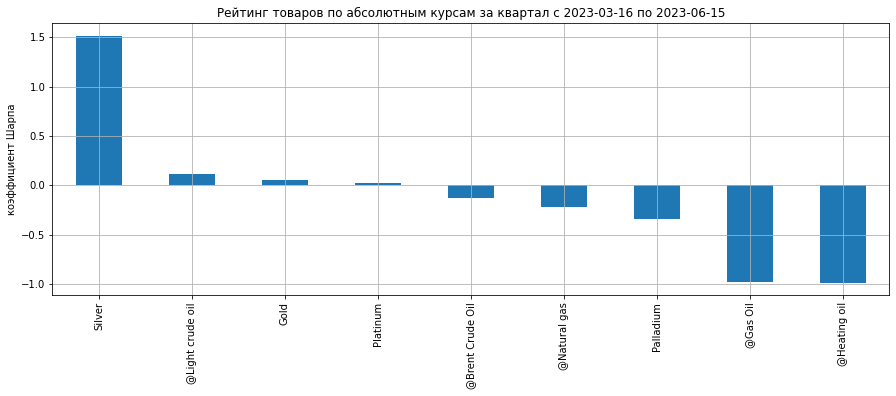

**Самые подросшие и самые упавшие по абсолютному курсу товары Мосбиржи за квартал:**

|Товар|Изменение|Ссылки|
|-|-|-|
|**Silver**|1.517%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Silver)|
|**@Light crude oil**|0.115%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Light-crude-oil)|
|**Gold**|0.058%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|...|...|...|
|**@Brent Crude Oil**|-0.123%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Brent-Crude-Oil)|
|**@Natural gas**|-0.219%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Natural-gas)|
|**Palladium**|-0.342%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|
|**@Gas Oil**|-0.978%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|
|**@Heating oil**|-0.986%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Heating-oil)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-квартал), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-квартал), [**Рейтинг абсолютной доходности за квартал**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-квартал), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-квартал), [**Рейтинг абсолютной стабильности валют за квартал**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-квартал)

## За квартал (долларовые курсы)

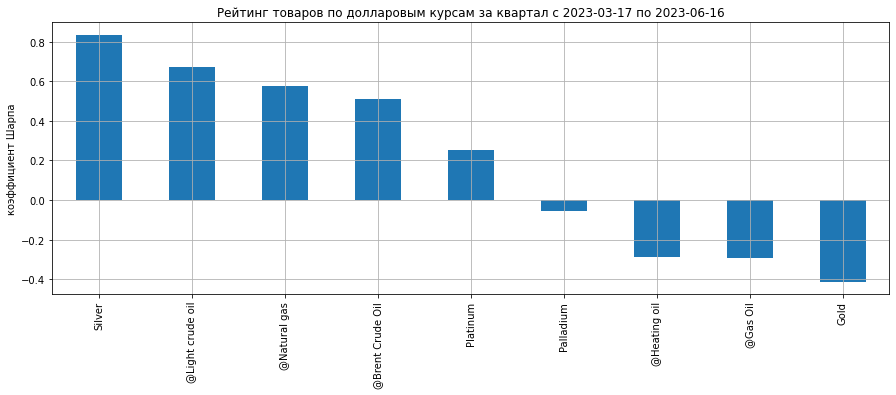

**Самые подросшие и самые упавшие по долларовому курсу товары Мосбиржи за квартал:**

|Товар|Изменение|Ссылки|
|-|-|-|
|**Silver**|0.835%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Silver)|
|**@Light crude oil**|0.673%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Light-crude-oil)|
|**@Natural gas**|0.578%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Natural-gas)|
|...|...|...|
|**Platinum**|0.252%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Platinum)|
|**Palladium**|-0.054%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|
|**@Heating oil**|-0.29%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Heating-oil)|
|**@Gas Oil**|-0.292%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|
|**Gold**|-0.412%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-квартал), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-квартал), [**Рейтинг абсолютной доходности за квартал**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-квартал), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-квартал), [**Рейтинг абсолютной стабильности валют за квартал**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-квартал)

--- 


# За полгода

## За полгода (абсолютные курсы)

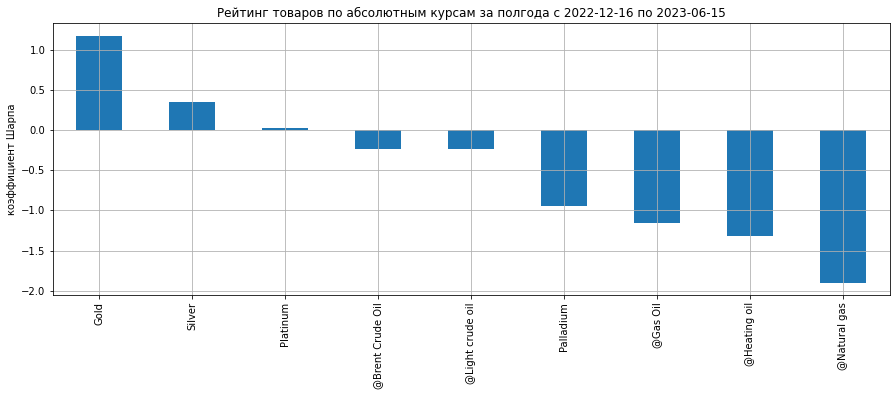

**Самые подросшие и самые упавшие по абсолютному курсу товары Мосбиржи за полгода:**

|Товар|Изменение|Ссылки|
|-|-|-|
|**Gold**|1.173%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|**Silver**|0.352%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Silver)|
|**Platinum**|0.03%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Platinum)|
|...|...|...|
|**@Light crude oil**|-0.239%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Light-crude-oil)|
|**Palladium**|-0.949%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|
|**@Gas Oil**|-1.163%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|
|**@Heating oil**|-1.324%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Heating-oil)|
|**@Natural gas**|-1.9%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Natural-gas)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-полгода), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-полгода), [**Рейтинг абсолютной доходности за полгода**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-полгода), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-полгода), [**Рейтинг абсолютной стабильности валют за полгода**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-полгода)

## За полгода (долларовые курсы)

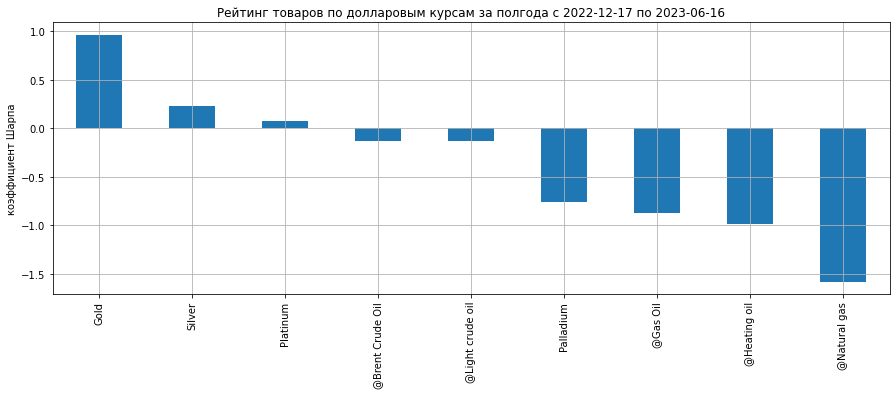

**Самые подросшие и самые упавшие по долларовому курсу товары Мосбиржи за полгода:**

|Товар|Изменение|Ссылки|
|-|-|-|
|**Gold**|0.968%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|**Silver**|0.231%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Silver)|
|**Platinum**|0.08%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Platinum)|
|...|...|...|
|**@Light crude oil**|-0.133%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Light-crude-oil)|
|**Palladium**|-0.756%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|
|**@Gas Oil**|-0.875%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|
|**@Heating oil**|-0.989%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Heating-oil)|
|**@Natural gas**|-1.58%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Natural-gas)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-полгода), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-полгода), [**Рейтинг абсолютной доходности за полгода**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-полгода), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-полгода), [**Рейтинг абсолютной стабильности валют за полгода**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-полгода)

--- 


# За год

## За год (абсолютные курсы)

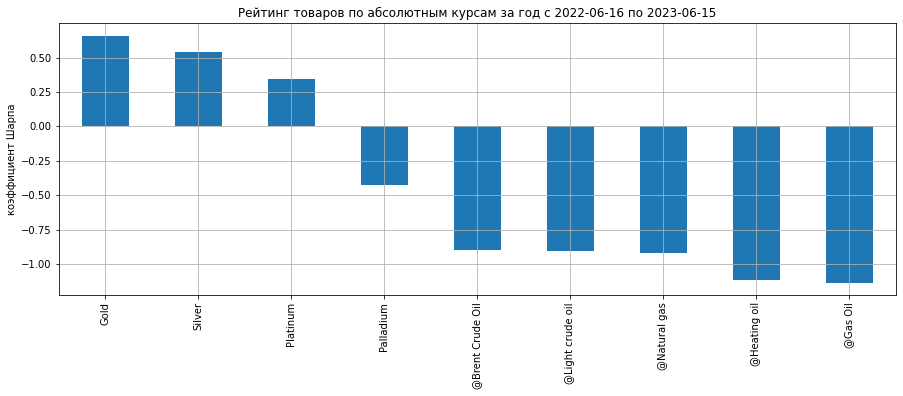

**Самые подросшие и самые упавшие по абсолютному курсу товары Мосбиржи за год:**

|Товар|Изменение|Ссылки|
|-|-|-|
|**Gold**|0.659%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|**Silver**|0.537%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Silver)|
|**Platinum**|0.342%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Platinum)|
|...|...|...|
|**@Brent Crude Oil**|-0.898%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Brent-Crude-Oil)|
|**@Light crude oil**|-0.903%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Light-crude-oil)|
|**@Natural gas**|-0.922%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Natural-gas)|
|**@Heating oil**|-1.117%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Heating-oil)|
|**@Gas Oil**|-1.135%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-год), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-год), [**Рейтинг абсолютной доходности за год**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-год), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-год), [**Рейтинг абсолютной стабильности валют за год**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-год)

## За год (долларовые курсы)

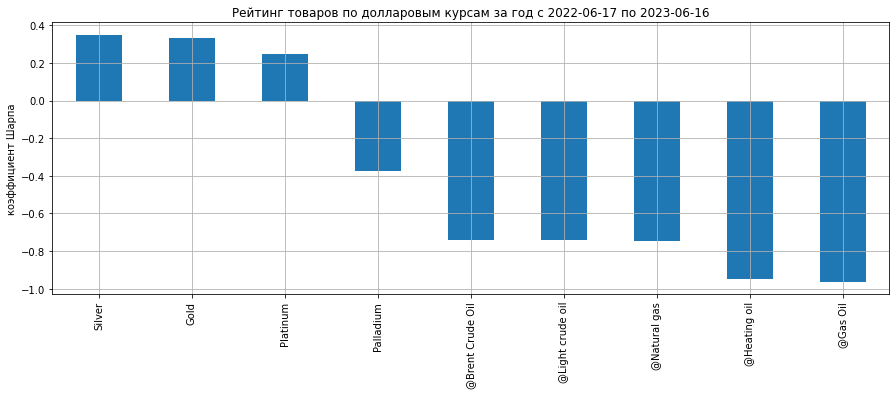

**Самые подросшие и самые упавшие по долларовому курсу товары Мосбиржи за год:**

|Товар|Изменение|Ссылки|
|-|-|-|
|**Silver**|0.35%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Silver)|
|**Gold**|0.33%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|**Platinum**|0.245%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Platinum)|
|...|...|...|
|**@Brent Crude Oil**|-0.74%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Brent-Crude-Oil)|
|**@Light crude oil**|-0.742%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Light-crude-oil)|
|**@Natural gas**|-0.745%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Natural-gas)|
|**@Heating oil**|-0.946%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Heating-oil)|
|**@Gas Oil**|-0.962%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-год), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-год), [**Рейтинг абсолютной доходности за год**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-год), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-год), [**Рейтинг абсолютной стабильности валют за год**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-год)

--- 


# За 2 года

## За 2 года (абсолютные курсы)

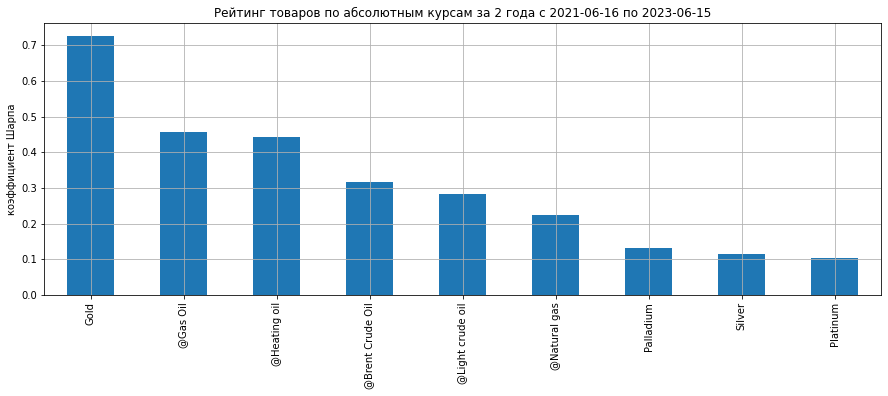

**Самые подросшие и самые упавшие по абсолютному курсу товары Мосбиржи за 2 года:**

|Товар|Изменение|Ссылки|
|-|-|-|
|**Gold**|0.726%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|**@Gas Oil**|0.457%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|
|**@Heating oil**|0.443%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Heating-oil)|
|...|...|...|
|**@Light crude oil**|0.283%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Light-crude-oil)|
|**@Natural gas**|0.225%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Natural-gas)|
|**Palladium**|0.131%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|
|**Silver**|0.116%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Silver)|
|**Platinum**|0.103%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Platinum)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-2-года), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-2-года), [**Рейтинг абсолютной доходности за 2 года**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-2-года), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-2-года), [**Рейтинг абсолютной стабильности валют за 2 года**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-2-года)

## За 2 года (долларовые курсы)

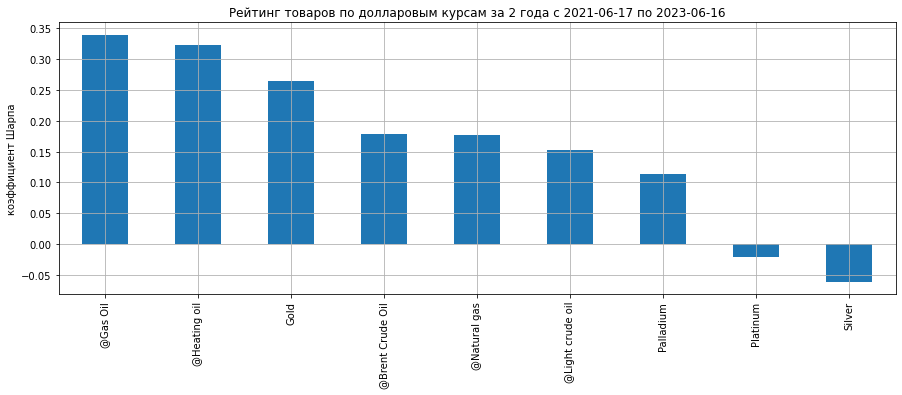

**Самые подросшие и самые упавшие по долларовому курсу товары Мосбиржи за 2 года:**

|Товар|Изменение|Ссылки|
|-|-|-|
|**@Gas Oil**|0.34%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|
|**@Heating oil**|0.323%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Heating-oil)|
|**Gold**|0.264%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|...|...|...|
|**@Natural gas**|0.176%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Natural-gas)|
|**@Light crude oil**|0.153%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Light-crude-oil)|
|**Palladium**|0.114%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|
|**Platinum**|-0.021%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Platinum)|
|**Silver**|-0.061%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Silver)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-2-года), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-2-года), [**Рейтинг абсолютной доходности за 2 года**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-2-года), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-2-года), [**Рейтинг абсолютной стабильности валют за 2 года**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-2-года)

--- 


# За 3 года

## За 3 года (абсолютные курсы)

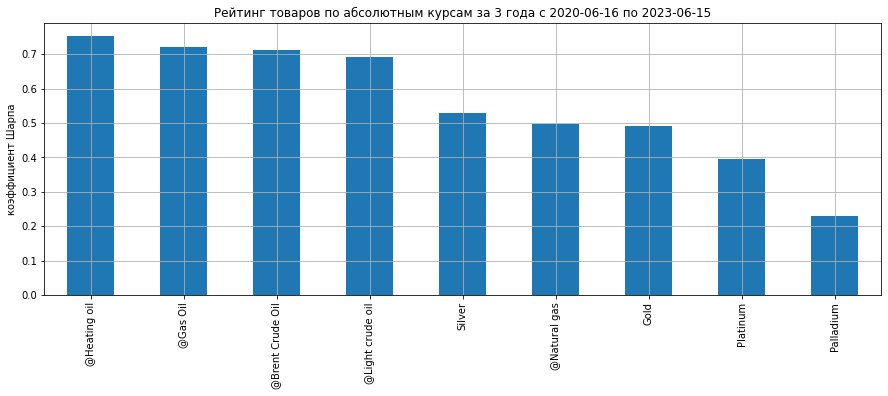

**Самые подросшие и самые упавшие по абсолютному курсу товары Мосбиржи за 3 года:**

|Товар|Изменение|Ссылки|
|-|-|-|
|**@Heating oil**|0.753%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Heating-oil)|
|**@Gas Oil**|0.721%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|
|**@Brent Crude Oil**|0.712%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Brent-Crude-Oil)|
|...|...|...|
|**Silver**|0.53%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Silver)|
|**@Natural gas**|0.499%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Natural-gas)|
|**Gold**|0.492%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|**Platinum**|0.396%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Platinum)|
|**Palladium**|0.23%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-3-года), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-3-года), [**Рейтинг абсолютной доходности за 3 года**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-3-года), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-3-года), [**Рейтинг абсолютной стабильности валют за 3 года**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-3-года)

## За 3 года (долларовые курсы)

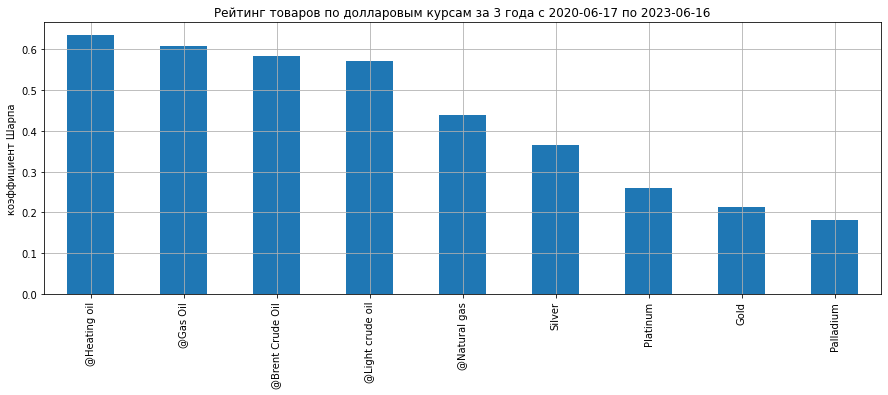

**Самые подросшие и самые упавшие по долларовому курсу товары Мосбиржи за 3 года:**

|Товар|Изменение|Ссылки|
|-|-|-|
|**@Heating oil**|0.635%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Heating-oil)|
|**@Gas Oil**|0.608%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|
|**@Brent Crude Oil**|0.585%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Brent-Crude-Oil)|
|...|...|...|
|**@Natural gas**|0.439%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Natural-gas)|
|**Silver**|0.365%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Silver)|
|**Platinum**|0.26%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Platinum)|
|**Gold**|0.214%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|**Palladium**|0.182%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-3-года), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-3-года), [**Рейтинг абсолютной доходности за 3 года**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-3-года), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-3-года), [**Рейтинг абсолютной стабильности валют за 3 года**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-3-года)

--- 


# За 5 лет

## За 5 лет (абсолютные курсы)

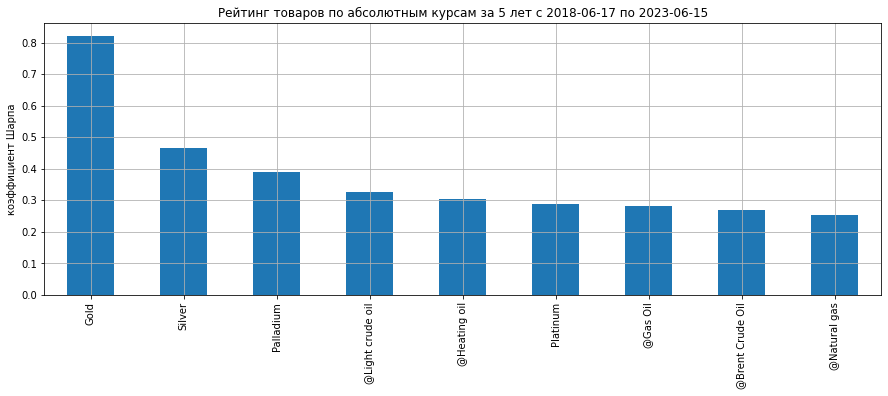

**Самые подросшие и самые упавшие по абсолютному курсу товары Мосбиржи за 5 лет:**

|Товар|Изменение|Ссылки|
|-|-|-|
|**Gold**|0.82%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|**Silver**|0.464%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Silver)|
|**Palladium**|0.388%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|
|...|...|...|
|**@Heating oil**|0.304%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Heating-oil)|
|**Platinum**|0.287%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Platinum)|
|**@Gas Oil**|0.283%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|
|**@Brent Crude Oil**|0.269%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Brent-Crude-Oil)|
|**@Natural gas**|0.253%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Natural-gas)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-5-лет), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-5-лет), [**Рейтинг абсолютной доходности за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-5-лет), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-5-лет), [**Рейтинг абсолютной стабильности валют за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-5-лет)

## За 5 лет (долларовые курсы)

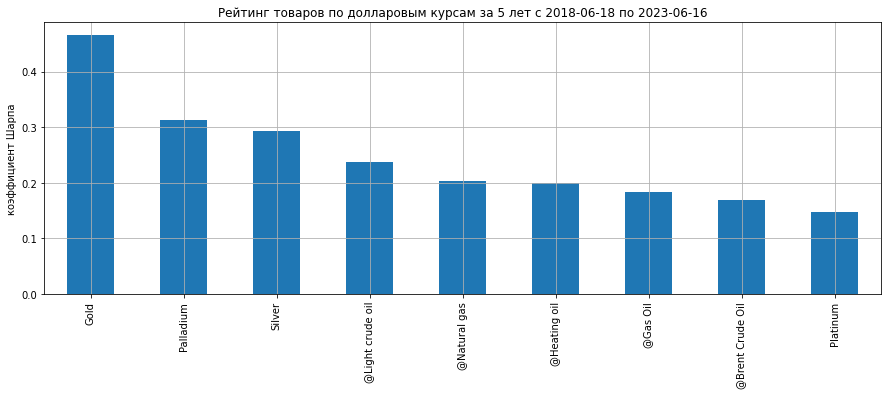

**Самые подросшие и самые упавшие по долларовому курсу товары Мосбиржи за 5 лет:**

|Товар|Изменение|Ссылки|
|-|-|-|
|**Gold**|0.465%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Gold)|
|**Palladium**|0.313%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Palladium)|
|**Silver**|0.294%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Silver)|
|...|...|...|
|**@Natural gas**|0.203%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Natural-gas)|
|**@Heating oil**|0.2%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Heating-oil)|
|**@Gas Oil**|0.183%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Gas-Oil)|
|**@Brent Crude Oil**|0.169%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#@Brent-Crude-Oil)|
|**Platinum**|0.147%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#Platinum)|


См.также: [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-5-лет), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-5-лет), [**Рейтинг абсолютной доходности за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-5-лет), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-5-лет), [**Рейтинг абсолютной стабильности валют за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-5-лет)

--- 


In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import abscur_menu
import abscur_post as ap

# меню проекта печатаем
abscur_menu.print_menu()

# абсолютные курсы товаров подкачиваем
tov_abs = pd.read_csv("/kaggle/input/mmvb-abscur-tovar/tov_abscur.csv",index_col=0,parse_dates=['Date'])
tov_close = pd.read_csv("/kaggle/input/mmvb-tovar/close_table.csv",index_col=0,parse_dates=['Dates'])

# расчет коэффициента Шарпа
def sharpe_ratio(return_series, N=255, rf=0.01):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

diap = [[30,"месяц"],[92,"квартал"],[182,"полгода"],[365,"год"],[2*365,"2 года"],[3*365,"3 года"],[5*365,"5 лет"]]

cnt = 0
texts = []

for per,title_per in diap:
    display(Markdown("# За " + title_per))
    
    display(Markdown("## За " + title_per + " (абсолютные курсы)"))
    
    date_start = tov_abs.asfreq(freq="D").index[-per]
    date_finish = tov_abs.index[-1]
    
    res = sharpe_ratio(tov_abs[tov_abs.index >= date_start].pct_change())
    res.sort_values(ascending=False,inplace=True)
    text = "Рейтинг товаров по абсолютным курсам за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по "+datetime.datetime.strftime(date_finish,"%Y-%m-%d")
    res.plot.bar(grid=True,title=text,ylabel="коэффициент Шарпа",legend=False,figsize=(15,5))
    texts.append(text)
    plt.savefig(str(cnt) + ".png")
    plt.show()
    cnt += 1
    
    text = "**Самые подросшие и самые упавшие по абсолютному курсу товары Мосбиржи за " + title_per + ":**\n\n"
    text += "|Товар|Изменение|Ссылки|\n"
    text += "|-|-|-|\n"
    for n in range(3):
        ticker = res.index[n]
        text += "|**" + ticker + "**|" + str(np.round(res[ticker],3)) + "%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#" + ticker.replace(" ","-") + ")|\n"
    text += "|...|...|...|\n"
    for n in range(len(res.index)-5,len(res.index)):
        ticker = res.index[n]
        text += "|**" + ticker + "**|" + str(np.round(res[ticker],3)) + "%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#" + ticker.replace(" ","-") + ")|\n"
    display(Markdown(text))
    
    text = "См.также: "
    text += "[**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной доходности за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной стабильности валют за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-" + title_per.replace(" ","-") + ")"
    display(Markdown(text))
    
    display(Markdown("## За " + title_per + " (долларовые курсы)"))
    
    date_start = tov_close.asfreq(freq="D").index[-per]
    date_finish = tov_close.index[-1]
    
    res = sharpe_ratio(tov_close[tov_close.index >= date_start].pct_change())
    res.sort_values(ascending=False,inplace=True)
    text = "Рейтинг товаров по долларовым курсам за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по "+datetime.datetime.strftime(date_finish,"%Y-%m-%d")
    res.plot.bar(grid=True,title=text,ylabel="коэффициент Шарпа",legend=False,figsize=(15,5))
    texts.append(text)
    plt.savefig(str(cnt) + ".png")
    plt.show()
    cnt += 1
    
    text = "**Самые подросшие и самые упавшие по долларовому курсу товары Мосбиржи за " + title_per + ":**\n\n"
    text += "|Товар|Изменение|Ссылки|\n"
    text += "|-|-|-|\n"
    for n in range(3):
        ticker = res.index[n]
        text += "|**" + ticker + "**|" + str(np.round(res[ticker],3)) + "%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#" + ticker.replace(" ","-") + ")|\n"
    text += "|...|...|...|\n"
    for n in range(len(res.index)-5,len(res.index)):
        ticker = res.index[n]
        text += "|**" + ticker + "**|" + str(np.round(res[ticker],3)) + "%|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#" + ticker.replace(" ","-") + ")|\n"
    display(Markdown(text))
    
    text = "См.также: "
    text += "[**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной доходности за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной стабильности валют за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-" + title_per.replace(" ","-") + ")"
    display(Markdown(text))
    
    display(Markdown("--- \n"))
#     break
    
num = np.random.randint(cnt)
ap.send_img_and_text(str(num) + ".png",texts[num] + "\n---\nИсточник - https://www.kaggle.com/code/eavprog/abscur-tovar-sharp")